In [27]:
%run ./utility.ipynb

# KNN

In [28]:
knn = KNeighborsClassifier(n_jobs=-1)

## Random parameter search

In [29]:
n_neighbors = [3,4,5,6,7,8,9,10]
weights = ["uniform", "distance"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10, 15, 20, 25, 30, 35, 40, 45, 50]
metric = ["minkowski", "mahalanobis"]

random_grid = {
    "n_neighbors":n_neighbors,
    "weights":weights,
    "algorithm":algorithm,
    "leaf_size":leaf_size,
    "metric":metric
}

In [30]:
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=random_grid, n_iter=100, cv=5, verbose=0, random_state=42, n_jobs=-1)
knn_random.fit(X_train, y_train)

c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return s

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'metric': ['minkowski', 'mahalanobis'],
                                        'n_neighbors': [3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [31]:
knn_random.best_params_

{'weights': 'distance',
 'n_neighbors': 4,
 'metric': 'minkowski',
 'leaf_size': 40,
 'algorithm': 'kd_tree'}

In [32]:
out = pd.DataFrame(knn_random.cv_results_)


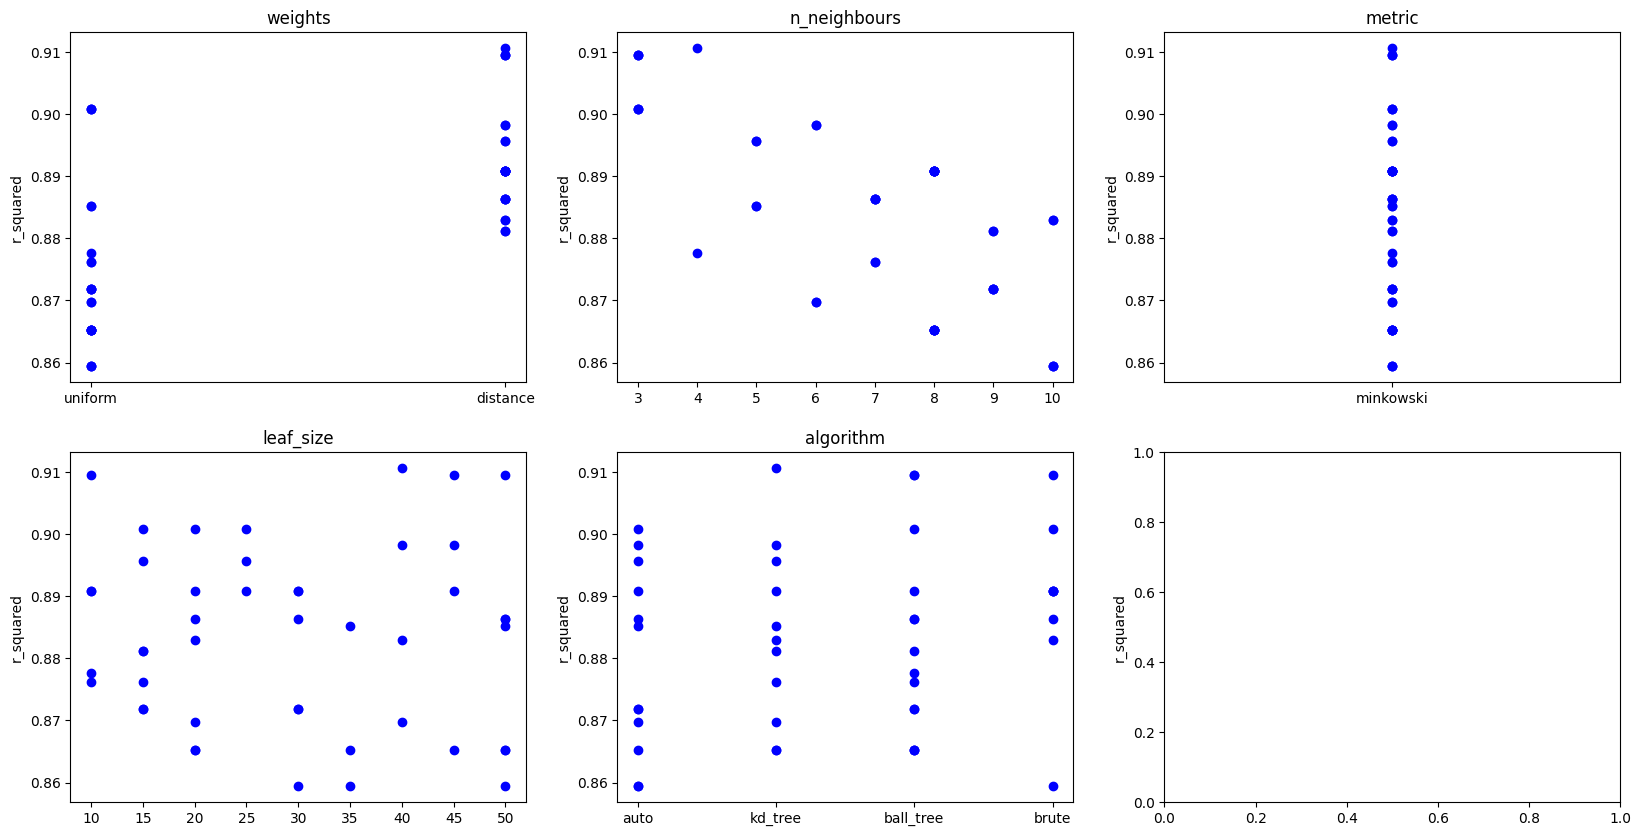

In [33]:
xlabel_names = ["param_weights","param_n_neighbors","param_metric","param_leaf_size","param_algorithm"]
fig, axs = plt.subplots(2,3, figsize=(20,10))

axs[0,0].scatter(out['param_weights'], out['mean_test_score'], c='blue');
axs[0,0].set_title('weights')

axs[0,1].scatter(out['param_n_neighbors'], out['mean_test_score'], c='blue');
axs[0,1].set_title('n_neighbours')

axs[0,2].scatter(out['param_metric'], out['mean_test_score'], c='blue');
axs[0,2].set_title('metric')

axs[1,0].scatter(out['param_leaf_size'], out['mean_test_score'], c='blue');
axs[1,0].set_title('leaf_size')

axs[1,1].scatter(out['param_algorithm'], out['mean_test_score'], c='blue');
axs[1,1].set_title('algorithm')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

## Grid search

In [34]:
param_grid = {
    "n_neighbors":[4,3,2],
    "weights":["distance"],
    "algorithm":["kd_tree", "ball_tree"],
    "leaf_size":[40, 45, 50],
    "metric":["minkowski"]
}

In [35]:
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5, verbose=0, n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_params = knn_grid.best_params_

In [36]:
best_params

{'algorithm': 'kd_tree',
 'leaf_size': 40,
 'metric': 'minkowski',
 'n_neighbors': 2,
 'weights': 'distance'}

In [37]:
knn_best = knn_grid.best_estimator_

In [38]:
cv_scores = cross_val_score(knn_best, X_train, y_train, cv=5)
print(cv_scores, np.mean(cv_scores))

[0.92767296 0.93074502 0.92654774 0.93704092 0.92654774] 0.9297108766094493


# Saving model

In [39]:
dump(knn_best, "./models/knn_best.joblib")

['./models/knn_best.joblib']